In [1]:
import pandas as pd
import numpy as np
from top2vec import Top2Vec

In [2]:
data = pd.read_csv("data/McDonalds-Yelp.csv",encoding="unicode_escape")
data.head()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  679455653    False   finalized                   3      2/21/15 0:36   
1  679455654    False   finalized                   3      2/21/15 0:27   
2  679455655    False   finalized                   3      2/21/15 0:26   
3  679455656    False   finalized                   3      2/21/15 0:27   
4  679455657    False   finalized                   3      2/21/15 0:27   

                   policies_violated policies_violated:confidence     city  \
0  RudeService\rOrderProblem\rFilthy          1.0\r0.6667\r0.6667  Atlanta   
1                        RudeService                            1  Atlanta   
2          SlowService\rOrderProblem                     1.0\r1.0  Atlanta   
3                                 na                       0.6667  Atlanta   
4                        RudeService                            1  Atlanta   

   policies_violated_gold                                             review  
0                     NaN  I'm not a huge mcds lover, but I've been to be...  
1                     NaN  Terrible customer service. Î¾I came in at 9:30...  
2                     NaN  First they "lost" my order, actually they gave...  
3                     NaN  I see I'm not the only one giving 1 star. Only...  
4                     NaN  Well, it's McDonald's, so you know what the fo...

In [3]:
df = pd.read_csv(
    "data/McDonalds-Yelp.csv",
    usecols=["_unit_id", "city", "review"],
    encoding="unicode_escape",
)
df.head()

_unit_id     city                                             review
0  679455653  Atlanta  I'm not a huge mcds lover, but I've been to be...
1  679455654  Atlanta  Terrible customer service. Î¾I came in at 9:30...
2  679455655  Atlanta  First they "lost" my order, actually they gave...
3  679455656  Atlanta  I see I'm not the only one giving 1 star. Only...
4  679455657  Atlanta  Well, it's McDonald's, so you know what the fo...

In [4]:
df.shape

(1525, 3)

In [5]:
docs_bad = df["review"].values.tolist()

In [6]:
docs_bad

["I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care.",
 'Terrible customer service. Î¾I came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. Î¾There was no one else waiting for their food inside either, just outside at the window. Î¾ I left and went to Chickfila next door and was greeted before I was all the way inside. This McDonalds is also dirty, the floor was covered with dropped food. Obviously filled with surly and unhappy workers.',
 'First they "lost" my order, actually they gave it to someone one else than took 20 minutes to figure out why I was still waiting for my order.They after I was asked what I needed I replied, "my order".They asked for my ticket and the asst mgr looked at the ticket then incompletely 

In [7]:
len(docs_bad)

1525

In [9]:
topic_model = Top2Vec(
    docs_bad,
    embedding_model="universal-sentence-encoder",
    speed="deep-learn",
  #  tokenizer="tok",
    ngram_vocab=True,
    ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"},
)

2023-12-29 17:56:35,346 - top2vec - INFO - Pre-processing documents for training
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-12-29 17:56:35,747 - top2vec - INFO - Downloading universal-sentence-encoder model
2023-12-29 17:57:41,488 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-29 17:57:42,134 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-29 17:57:47,757 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-29 17:57:47,783 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [14]:
topic_model.get_num_topics() #3
topic_words, word_scores, topic_nums = topic_model.get_topics()


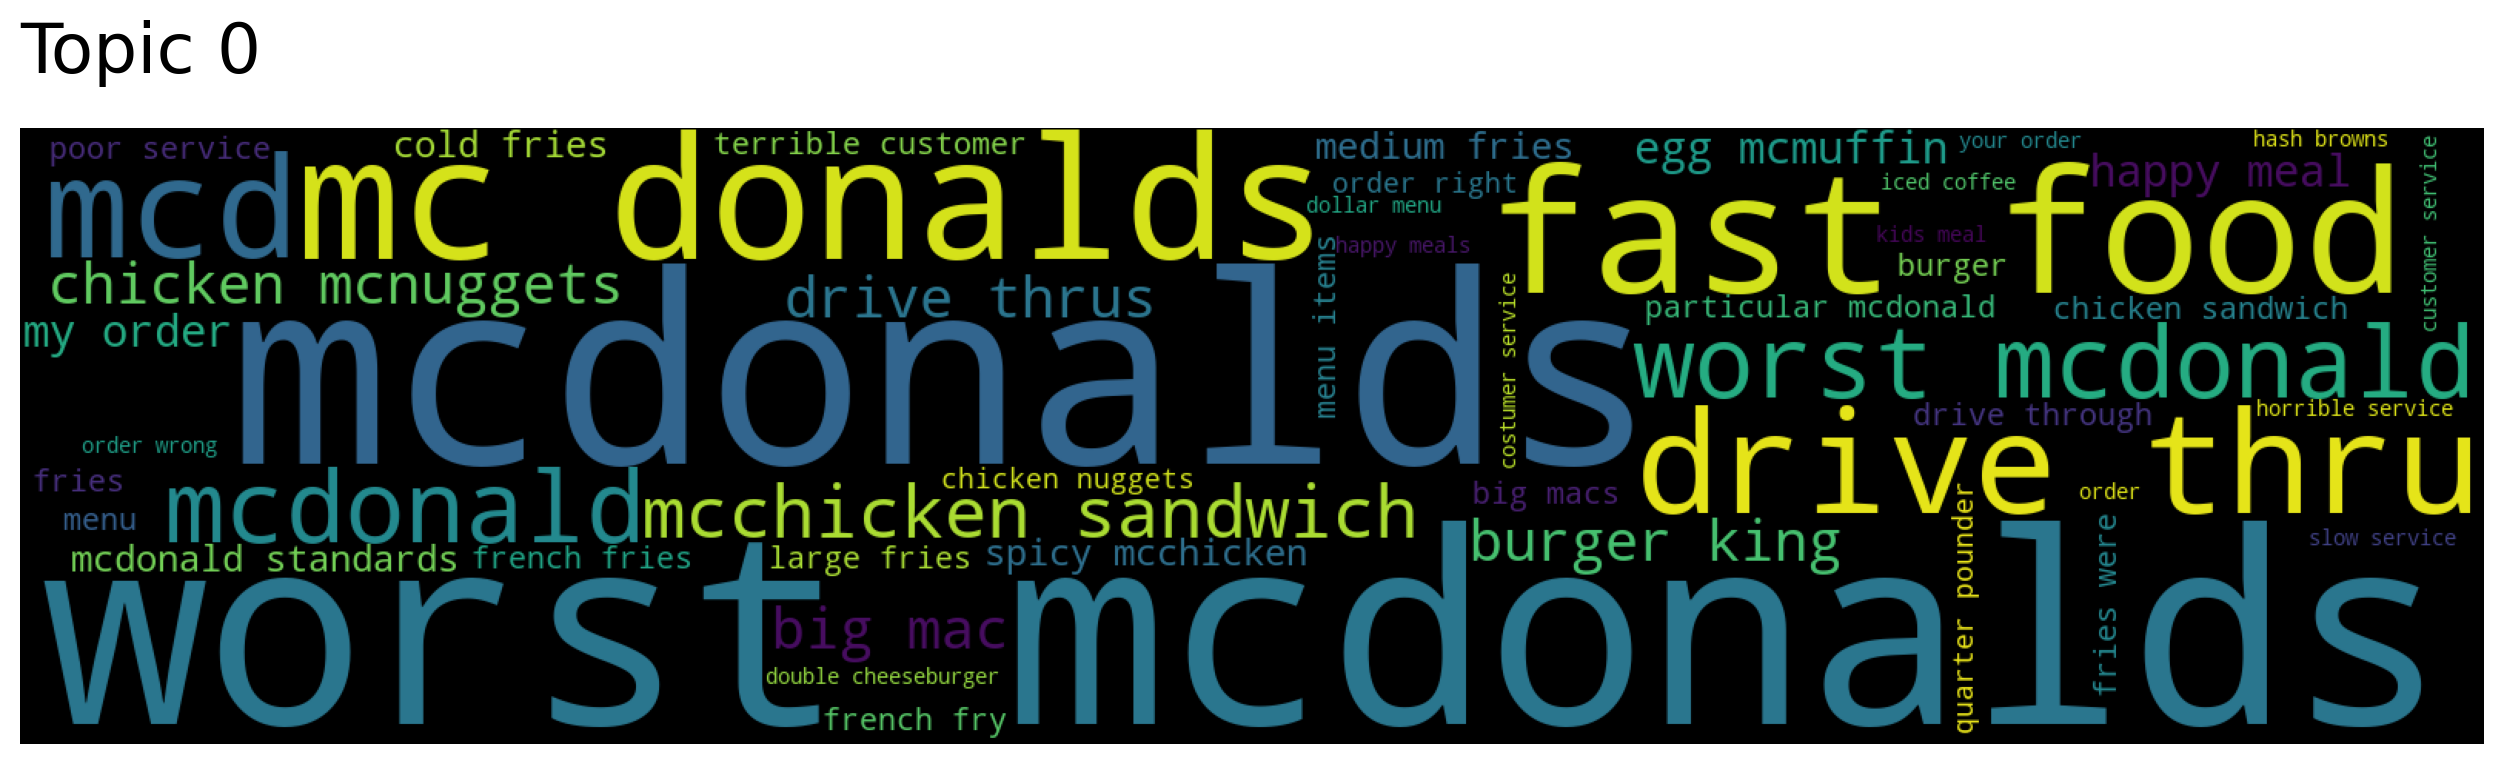

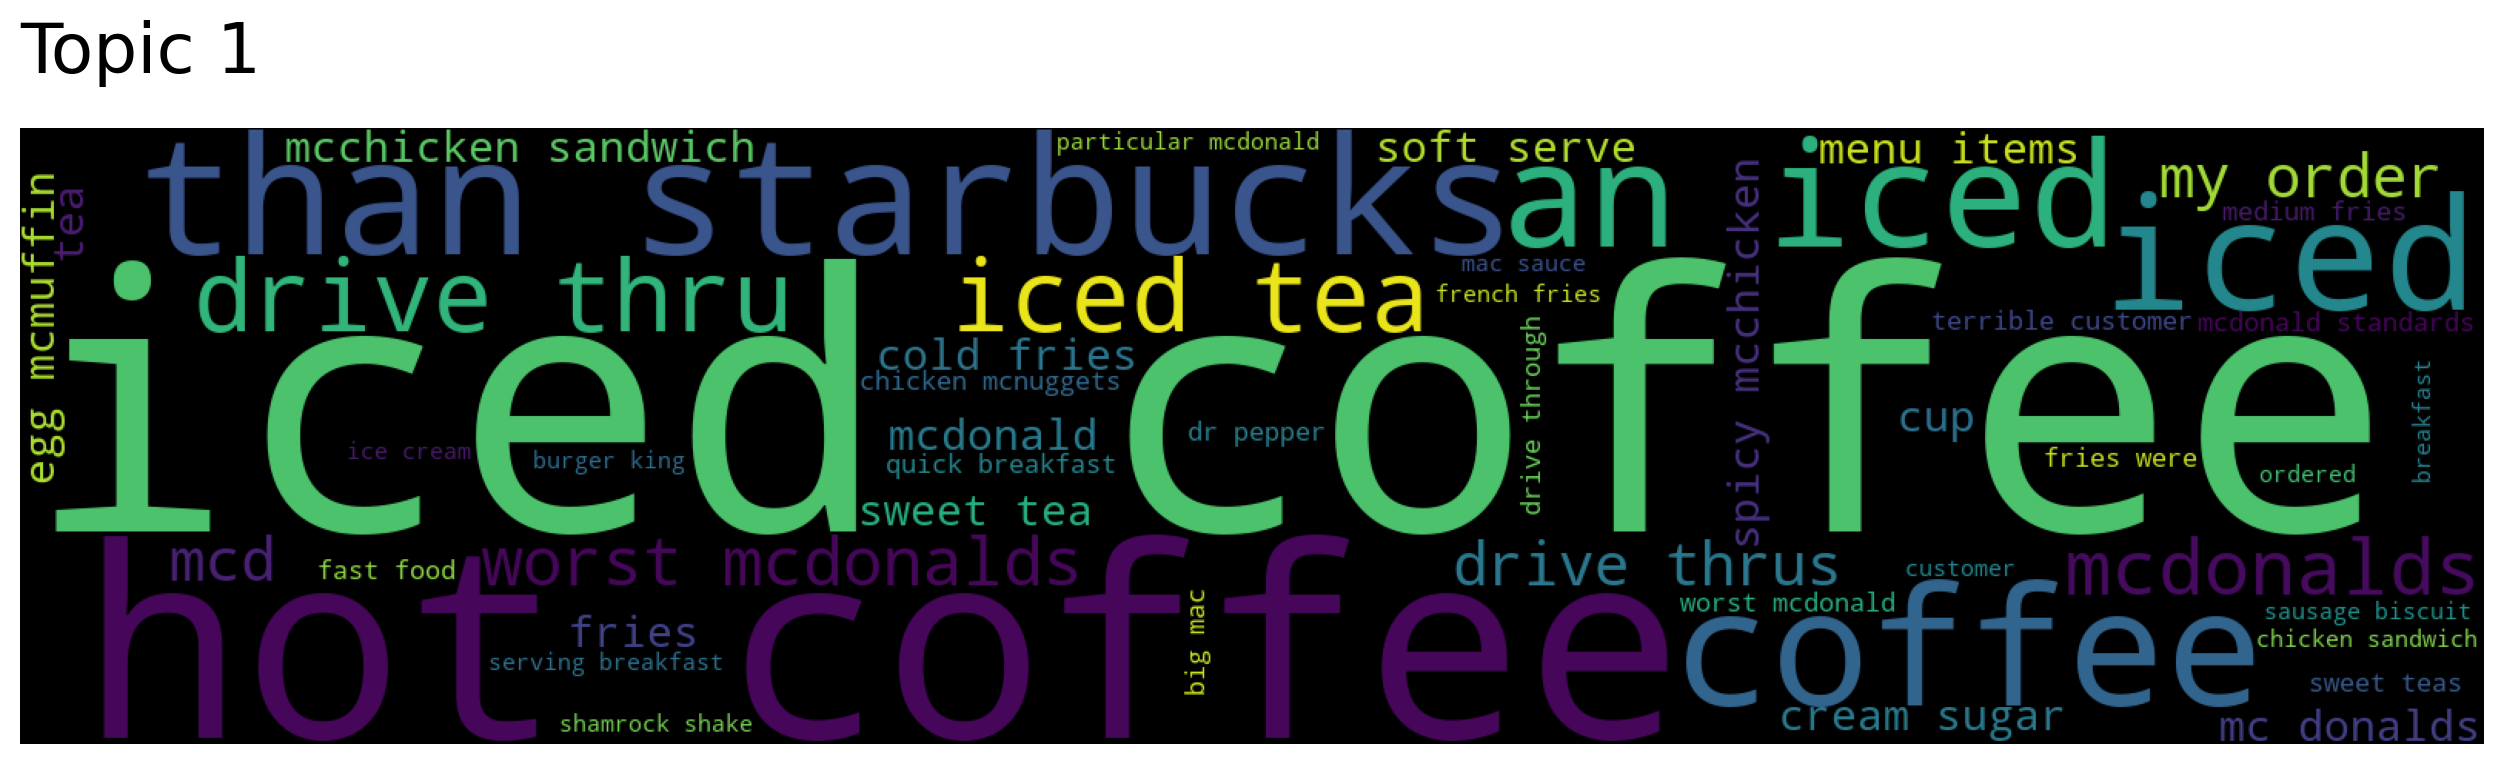

In [15]:

for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

In [39]:
topic_model.topic_words

array([['worst mcdonalds', 'mcdonalds', 'mc donalds', 'fast food',
        'drive thru', 'mcd', 'worst mcdonald', 'mcdonald',
        'mcchicken sandwich', 'chicken mcnuggets', 'burger king',
        'drive thrus', 'big mac', 'egg mcmuffin', 'my order',
        'happy meal', 'spicy mcchicken', 'medium fries',
        'mcdonald standards', 'cold fries', 'particular mcdonald',
        'fries were', 'chicken sandwich', 'fries', 'menu items',
        'large fries', 'poor service', 'big macs', 'drive through',
        'terrible customer', 'french fries', 'burger', 'french fry',
        'menu', 'chicken nuggets', 'quarter pounder', 'order right',
        'double cheeseburger', 'order wrong', 'dollar menu',
        'horrible service', 'slow service', 'your order',
        'costumer service', 'happy meals', 'hash browns',
        'customer service', 'kids meal', 'iced coffee', 'order'],
       ['iced coffee', 'hot coffee', 'than starbucks', 'coffee', 'iced',
        'an iced', 'iced tea', 'dri

In [16]:
(
    documents,
    document_scores,
    document_ids,
) = topic_model.search_documents_by_keywords(
    keywords=["wrong", "slow","worst"], num_docs=5
)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()
 

Document: 930, Score: 0.4171564631610196
-----------
No drive through :-/
-----------

Document: 181, Score: 0.3744511323069748
-----------
Awful service and extremely slow. Go elsewhere.
-----------

Document: 367, Score: 0.32477577484827974
-----------
No Hot Mustard :(
-----------

Document: 320, Score: 0.3182591196506438
-----------
fast, Î¾a little toooo fast
-----------

Document: 214, Score: 0.31520738212331123
-----------
Terrible service, plain and simple!
-----------



In [36]:
model = Top2Vec(docs_bad, workers=4, embedding_model='universal-sentence-encoder',speed="deep-learn")


2023-12-29 19:38:24,989 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-12-29 19:38:25,188 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-29 19:38:28,417 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-29 19:38:29,014 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-29 19:38:31,864 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-29 19:38:31,885 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


# Viewing the number of Topics

In [37]:
model.get_num_topics()

6

# Getting Keywords of Each Topic

In [38]:
model.topic_words

array([['mcdonalds', 'mcdonald', 'mcd', 'burger', 'fries', 'menu',
        'nuggets', 'service', 'meal', 'customer', 'management',
        'restaurant', 'cashier', 'ketchup', 'customers', 'lunch', 'food',
        'sandwich', 'order', 'breakfast', 'parking', 'iced', 'employees',
        'staff', 'ordering', 'terrible', 'horrible', 'fast', 'homeless',
        'eating', 'sausage', 'clean', 'manager', 'ordered', 'eat',
        'working', 'seriously', 'chicken', 'mac', 'work', 'orders',
        'worst', 'really', 'bad', 'best', 'employee', 'slow', 'attitude',
        'way', 'busy'],
       ['mcdonalds', 'order', 'customer', 'ordering', 'orders',
        'ordered', 'mcd', 'customers', 'mcdonald', 'cashier', 'menu',
        'service', 'fries', 'manager', 'management', 'burger', 'waiting',
        'iced', 'rude', 'employees', 'nuggets', 'attitude', 'waited',
        'busy', 'slow', 'employee', 'asked', 'horrible', 'restaurant',
        'call', 'parking', 'working', 'receipt', 'sandwich', 'seri

# Creating Topic Wordclouds

In [40]:
model.get_num_topics() #3
topic_words, word_scores, topic_nums = model.get_topics()

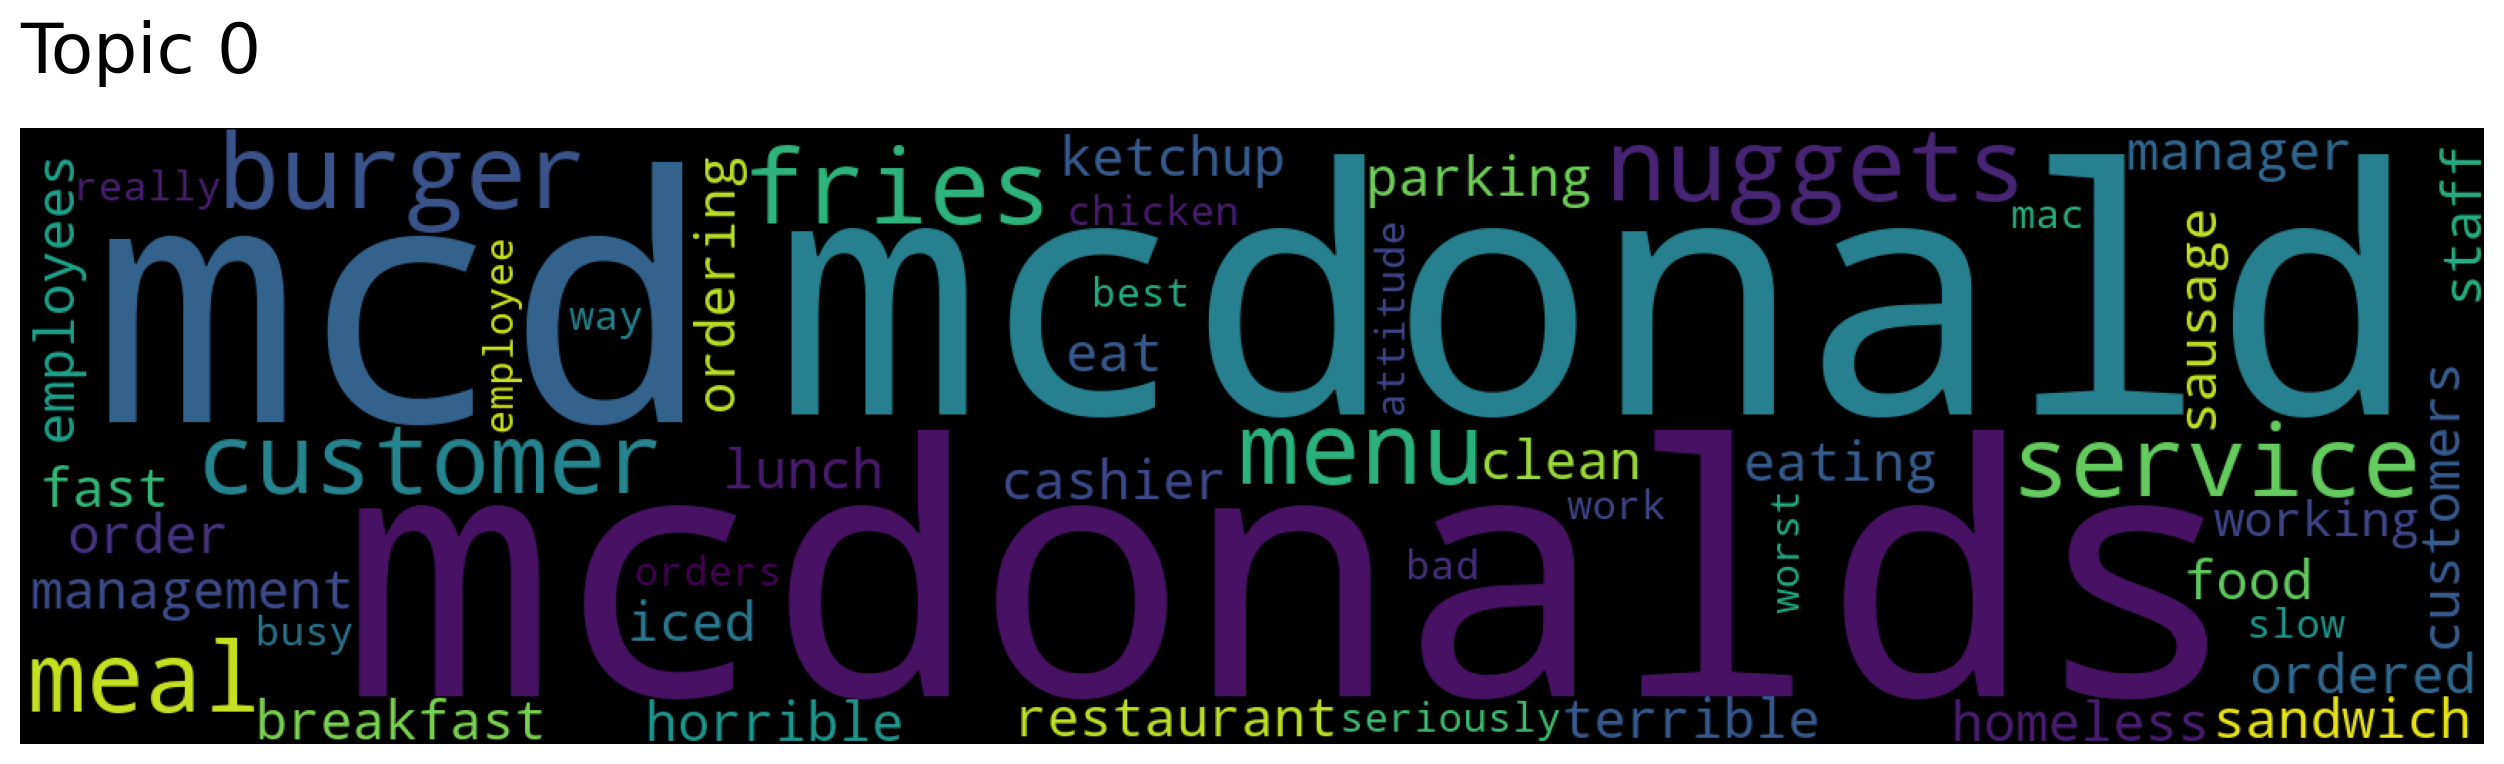

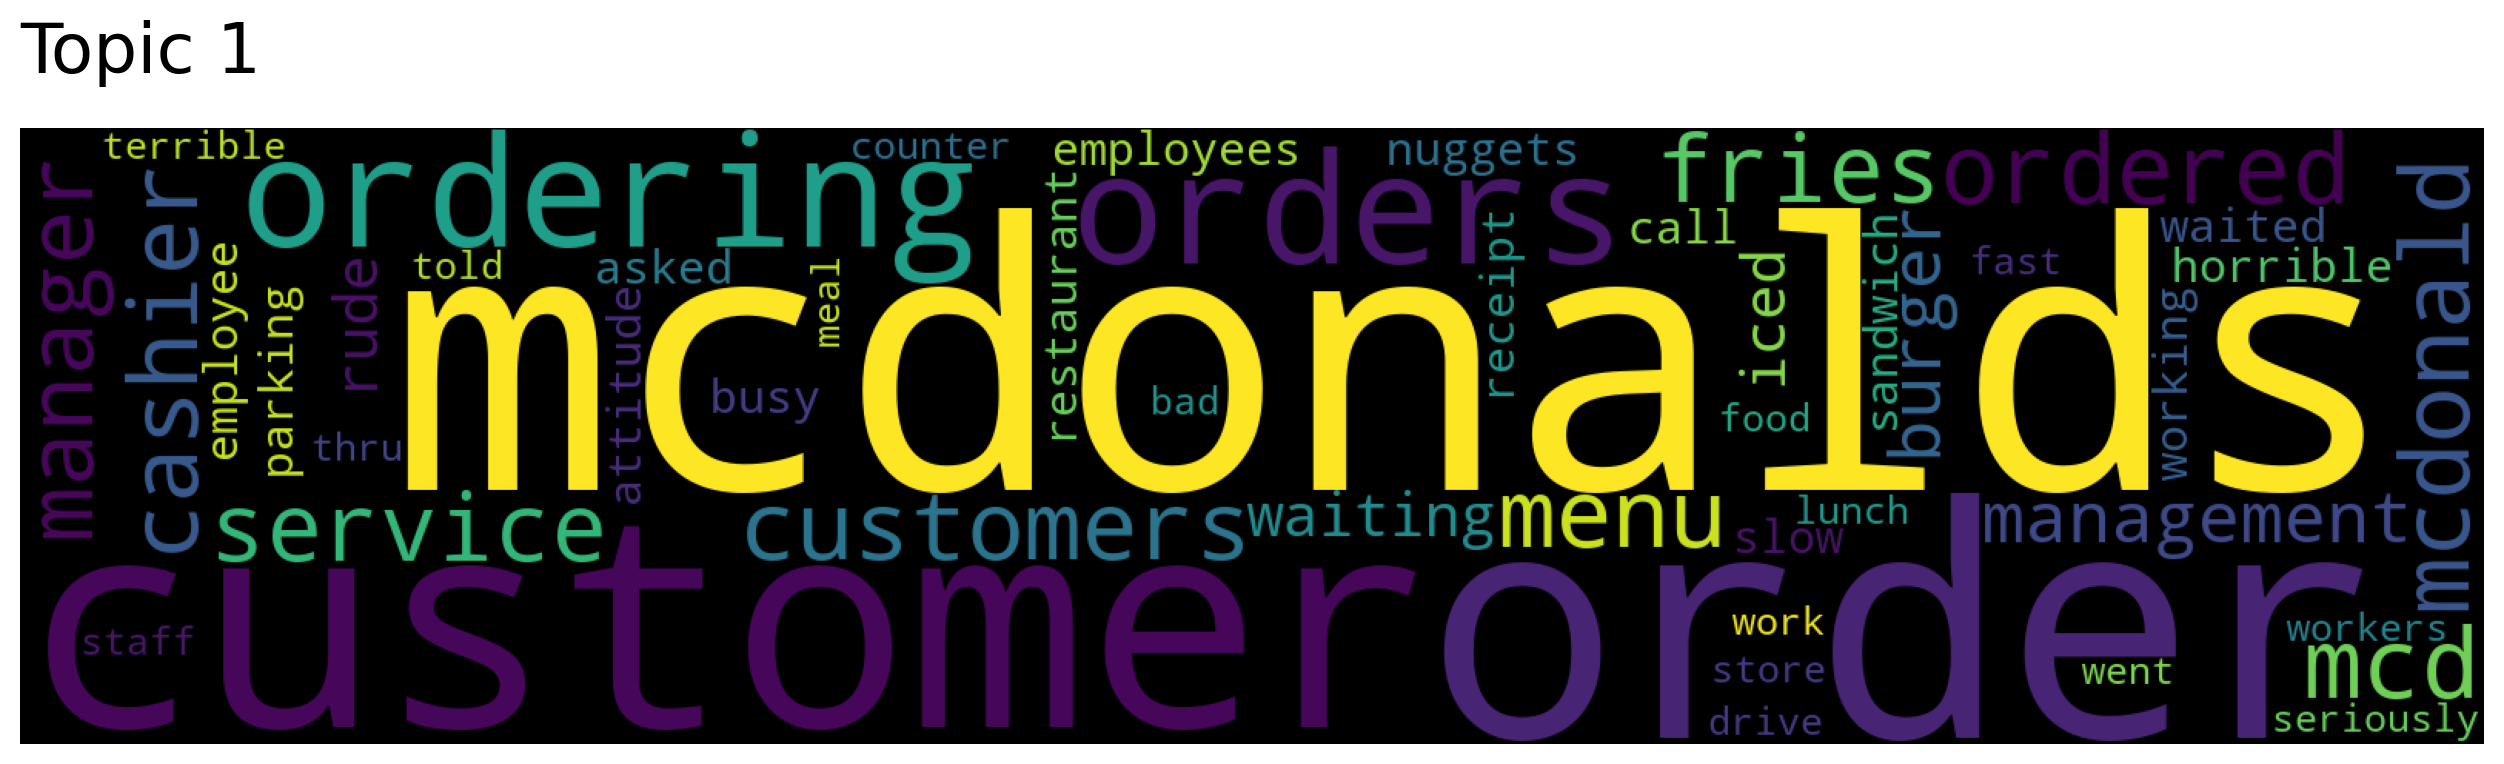

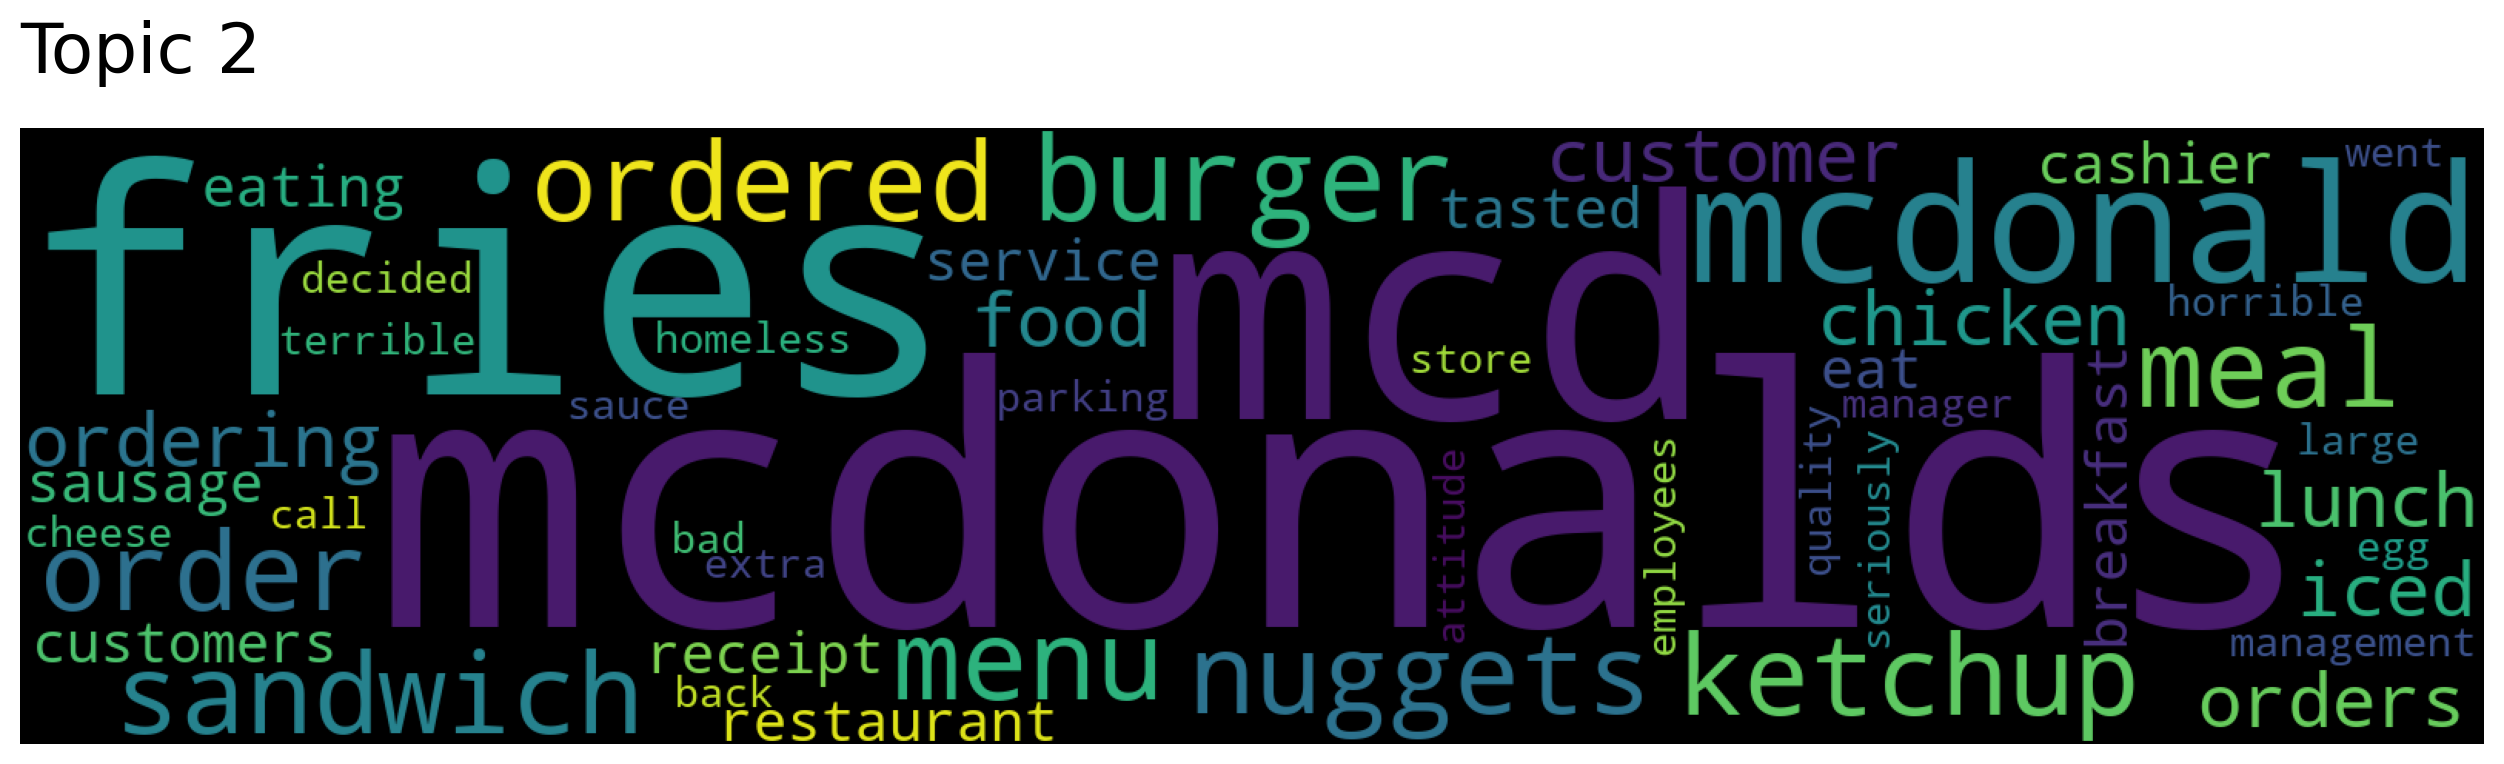

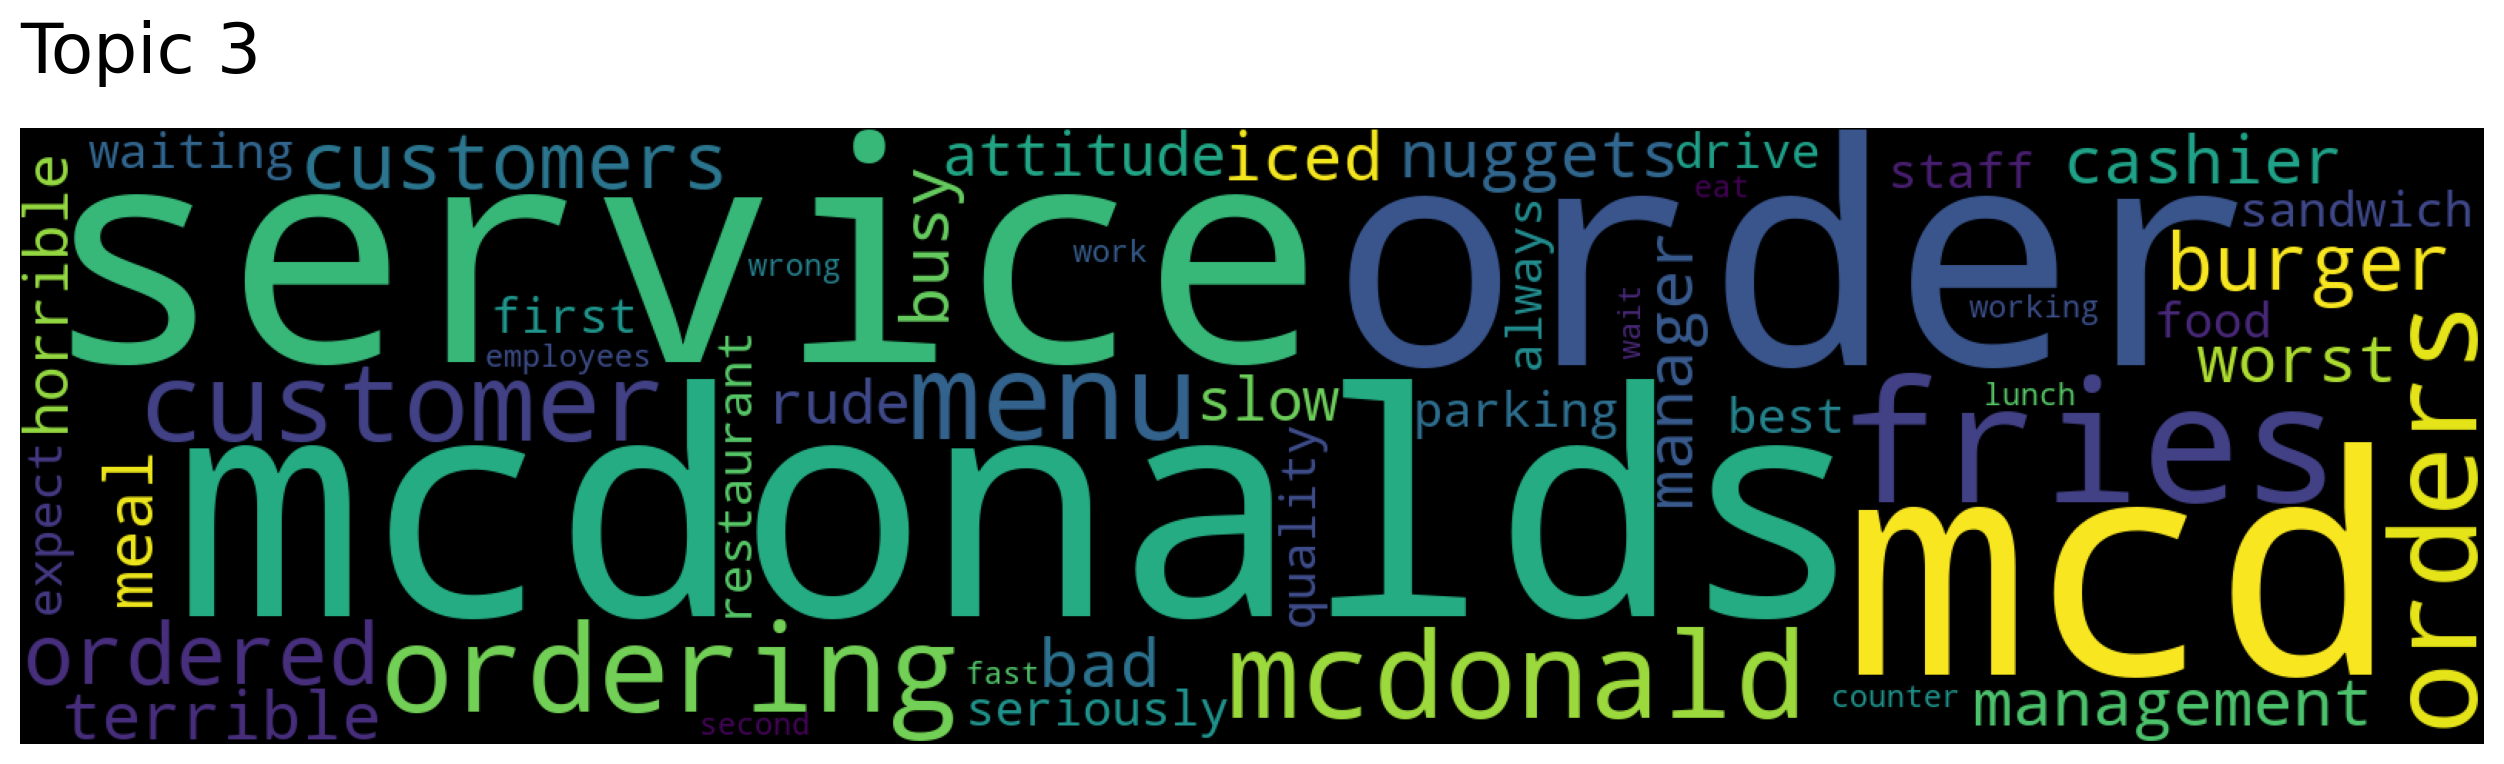

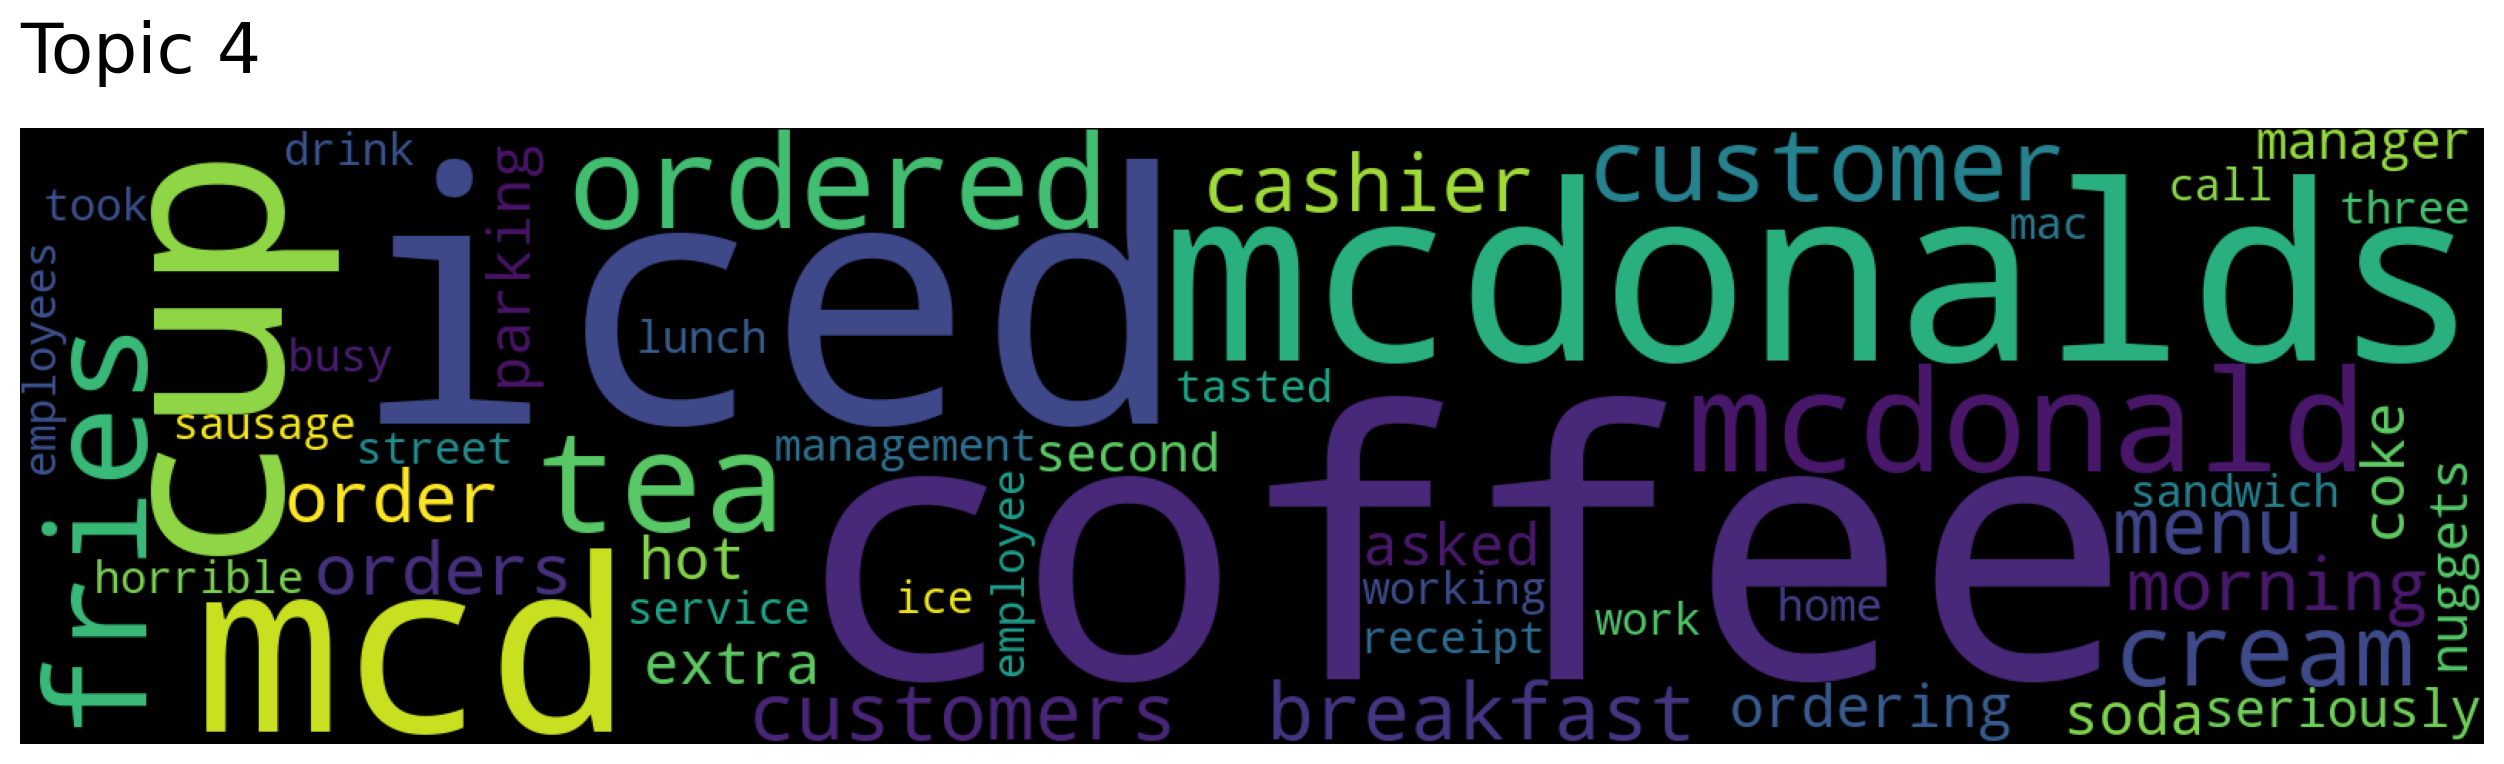

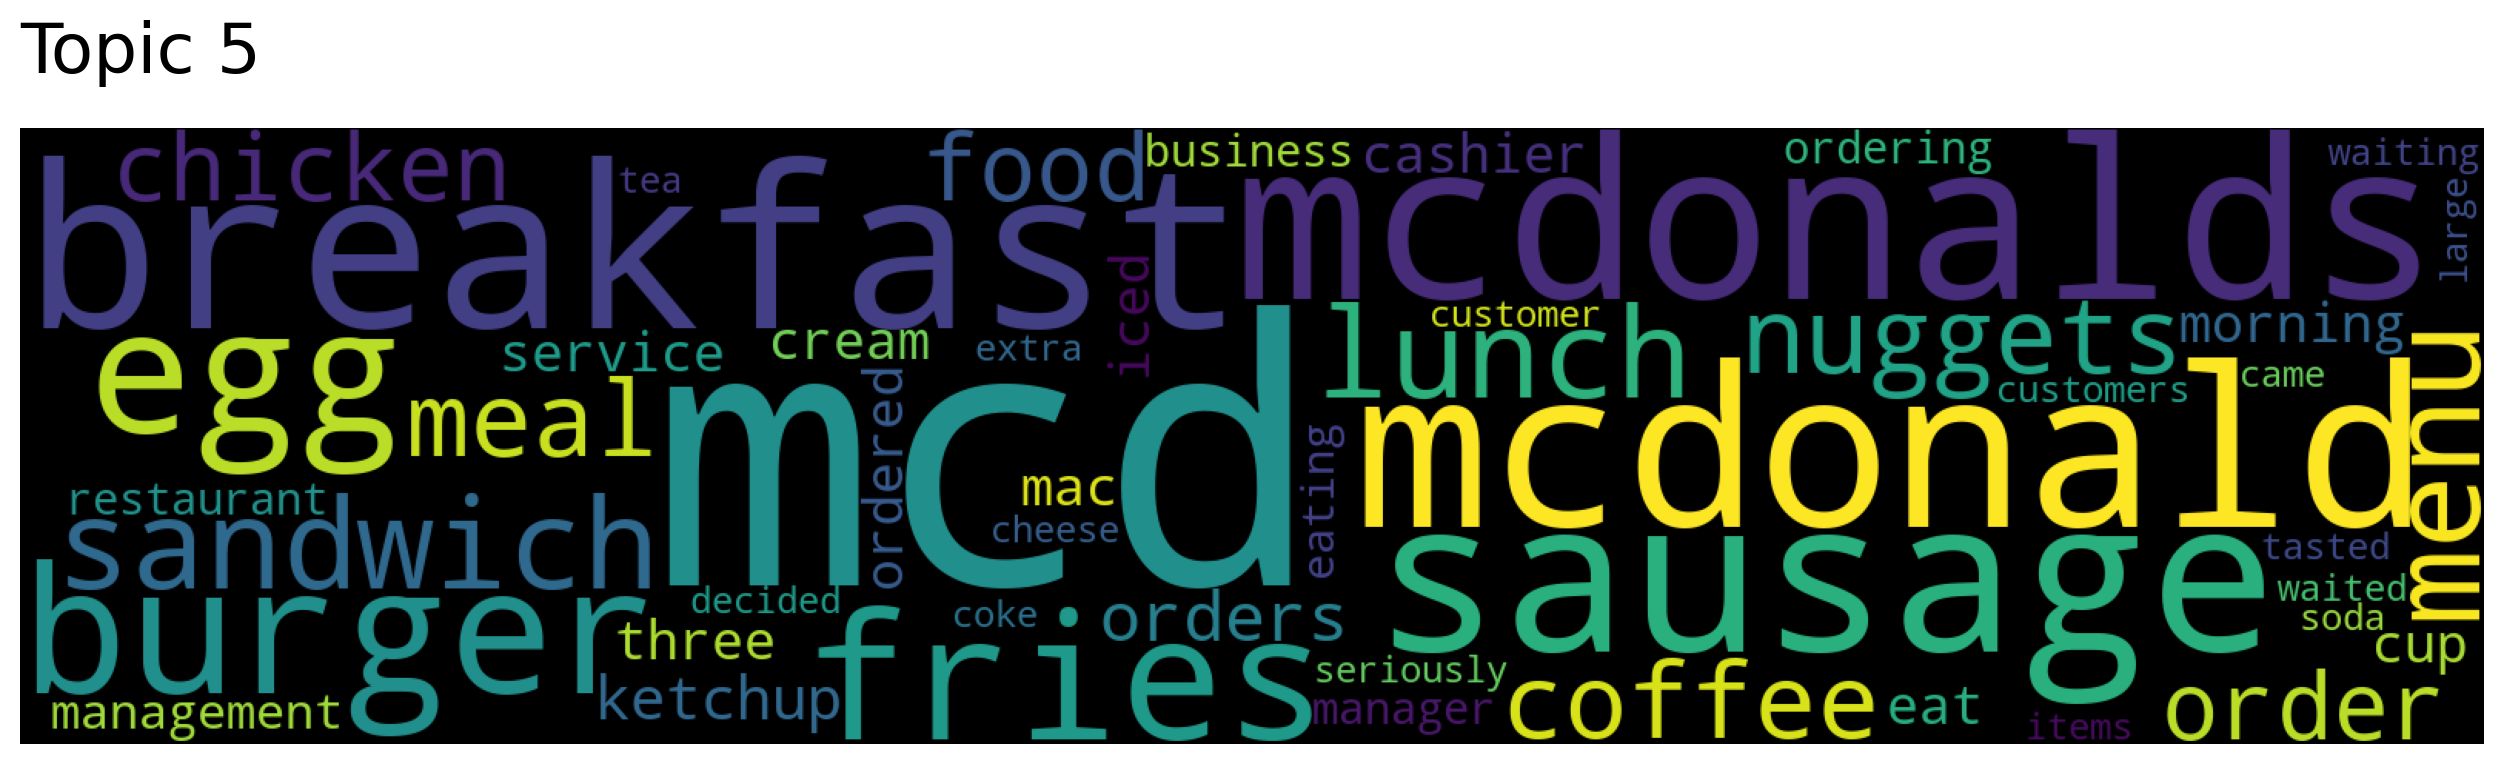

In [42]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [44]:
(
    documents,
    document_scores,
    document_ids,
) = model.search_documents_by_keywords(
    keywords=["waited", "slow","worst"], num_docs=5
)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 181, Score: 0.40871345483027255
-----------
Awful service and extremely slow. Go elsewhere.
-----------

Document: 320, Score: 0.38552296003399167
-----------
fast, Î¾a little toooo fast
-----------

Document: 930, Score: 0.3832388995082743
-----------
No drive through :-/
-----------

Document: 865, Score: 0.3194664071535106
-----------
Very poor service, and super slow, I hate going to this location
-----------

Document: 1001, Score: 0.31310186360985076
-----------
Nasty....Will never go again
-----------



# Accessing Topic Vectors

In [46]:
model.topic_vectors

array([[-0.02070349, -0.03429596, -0.02516222, ..., -0.00594338,
        -0.04571806, -0.05173   ],
       [-0.04258744, -0.06272465,  0.02915335, ...,  0.00251623,
        -0.04701744, -0.04785054],
       [-0.01115766, -0.056805  ,  0.03873612, ...,  0.00326023,
        -0.03919902, -0.08350313],
       [ 0.00264876, -0.0770027 ,  0.01082143, ..., -0.02761864,
        -0.03373988, -0.03903175],
       [-0.01546306, -0.03282059, -0.02573899, ..., -0.02142696,
        -0.04277751, -0.05488659],
       [-0.01731806, -0.03835154, -0.01026186, ...,  0.00151142,
        -0.03846566, -0.06612937]], dtype=float32)

# Searching for Topics by Keyword

In [55]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["Wait"], num_topics=3)


In [56]:
topic_words, topic_scores

([array(['mcdonalds', 'order', 'service', 'mcd', 'fries', 'ordering',
         'menu', 'mcdonald', 'orders', 'customer', 'ordered', 'burger',
         'customers', 'management', 'cashier', 'iced', 'worst', 'nuggets',
         'manager', 'meal', 'bad', 'busy', 'terrible', 'attitude', 'slow',
         'rude', 'horrible', 'seriously', 'food', 'waiting', 'staff',
         'restaurant', 'sandwich', 'best', 'expect', 'parking', 'quality',
         'drive', 'first', 'always', 'employees', 'wrong', 'second', 'eat',
         'lunch', 'wait', 'work', 'counter', 'working', 'fast'],
        dtype='<U10'),
  array(['mcdonalds', 'order', 'customer', 'ordering', 'orders', 'ordered',
         'mcd', 'customers', 'mcdonald', 'cashier', 'menu', 'service',
         'fries', 'manager', 'management', 'burger', 'waiting', 'iced',
         'rude', 'employees', 'nuggets', 'attitude', 'waited', 'busy',
         'slow', 'employee', 'asked', 'horrible', 'restaurant', 'call',
         'parking', 'working', 'recei

# Searching for Documents by Topic

In [58]:
model.search_documents_by_topic(0, num_docs=1)

(array(["I have to say, this McDonald's sucks. Don't get me wrong, I love McDonald's... But this particular location has some of the worst employees in fast food."],
       dtype=object),
 array([0.82756484], dtype=float32),
 array([94]))

# Using the Model's Embedding Function

In [59]:
embedding_vector = model.embed(["This is a fake news article."])
embedding_vector.shape

TensorShape([1, 512])

# Reducing the Number of Topics

In [60]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=2)

In [62]:
topic_mapping[0]

[5, 2, 3, 4, 1]

In [63]:
model.topic_words_reduced[0]

array(['mcdonalds', 'mcd', 'mcdonald', 'fries', 'menu', 'order',
       'ordered', 'ordering', 'burger', 'customer', 'orders', 'customers',
       'cashier', 'service', 'iced', 'nuggets', 'sandwich', 'management',
       'manager', 'meal', 'ketchup', 'food', 'restaurant', 'horrible',
       'lunch', 'employees', 'waiting', 'breakfast', 'rude', 'attitude',
       'seriously', 'receipt', 'terrible', 'parking', 'call', 'waited',
       'went', 'chicken', 'slow', 'bad', 'asked', 'busy', 'tasted',
       'employee', 'working', 'eat', 'worst', 'store', 'sausage', 'work'],
      dtype='<U10')

# BertTopic

In [18]:
import nltk

In [19]:
english_stemmer = nltk.stem.SnowballStemmer('english') 

In [28]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])


NameError: name 'CountVectorizer' is not defined

In [29]:


def train_bert(docs,model_path):
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

    # Clustering model: See [2] for more details
    cluster_model = HDBSCAN(min_cluster_size = 15, 
                            metric = 'euclidean', 
                            cluster_selection_method = 'eom', 
                            prediction_data = True)
    
    #Explicitly define, use, and adjust the ClassTfidfTransformer with new parameters, 
    #bm25_weighting and reduce_frequent_words, to potentially improve the topic representation
    ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)                         
    #vectorizer_model = CountVectorizer(ngram_range=(1, 2),stop_words=stopwords)
    vectorizer_model = StemmedCountVectorizer(analyzer="word",stop_words=stopwords, ngram_range=(1, 2))

    # BERTopic model
    topic_model = BERTopic(embedding_model = embedding_model,
                           hdbscan_model = cluster_model,
                           ctfidf_model=ctfidf_model,
                           vectorizer_model=vectorizer_model,
                           language="english")

    # Fit the model on a corpus
    topics, probs = topic_model.fit_transform(docs)
    topic_model.save(model_path)
    return topic_model

In [30]:
model_path_bad = 'model/bert_bad'
topic_model_bad = train_bert(docs_bad,model_path_bad)
freq_df = topic_model_bad.get_topic_info()
print("Number of topics: {}".format( len(freq_df)))
freq_df['Percentage'] = round(freq_df['Count']/freq_df['Count'].sum() * 100,2)
freq_df = freq_df.iloc[:,[0,1,3,2]]
freq_df.head()

NameError: name 'SentenceTransformer' is not defined